In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
# Countries = ['India', 'World', 'World without China',
#                       'US', 'Italy', 'Spain', 'China', 'Argentina',
#                       'UK', 'France', 'Brazil',
#                       'S.Korea', 'Iran', 'Belgium', 'New Zealand', 
#                        'Russia', 'Mexico']#[::-1]
colors = {'India': 'Blue', 
          'World': 'Blue', 
#           'World without China': 'Green', 
          'US': 'Black', 'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
          'S.Korea': 'lightgreen', 
          'France': 'violet', 
#           'Germany': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
          'New Zealand': 'lightblue'}

Countries = list(colors.keys())

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [9]:
Deaths = DF.copy()

In [10]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-12-03,139188,1506260,276325,4745,46038,58038,49348,60210,536,54231,39305,41173,108173,175270,25
2020-12-04,139700,1518670,278932,4746,46252,58852,49695,60714,540,54859,39512,41730,108863,175964,25
2020-12-05,140182,1528868,281186,4746,46252,59514,50016,61111,545,55073,39632,42228,109456,176628,25
2020-12-06,140573,1536056,282299,4746,46252,60078,50310,61342,549,55247,39770,42675,109717,176941,25
2020-12-07,140958,1544533,283703,4746,46646,60606,50594,61531,552,55613,39888,43122,110074,177317,25


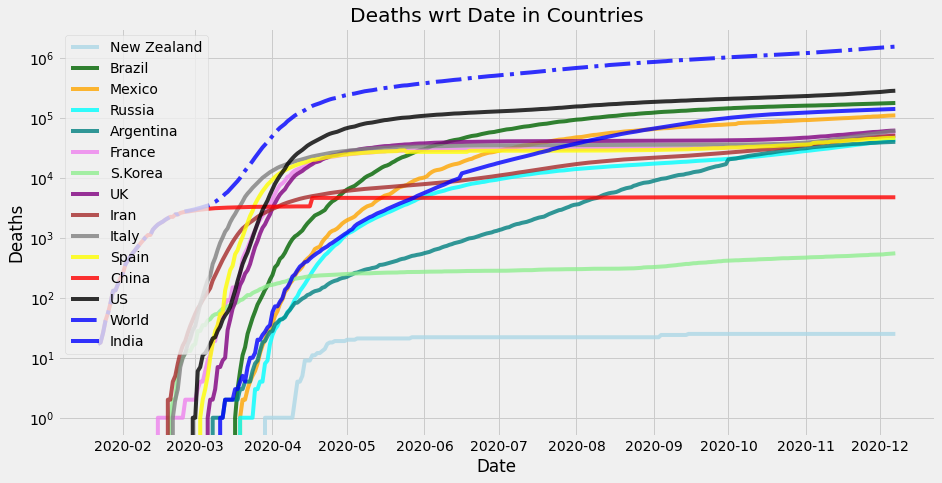

In [11]:
plotter(Deaths, 'Deaths')

In [12]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-12-03,501.86,10381.64,1694.00,0.21,267.64,726.29,423.64,452.86,2.50,502.14,198.07,474.86,576.36,514.93,0.0
2020-12-04,498.14,10422.50,1743.93,0.29,259.50,734.50,414.21,452.36,2.64,465.57,194.43,482.14,574.29,525.07,0.0
2020-12-05,496.79,10523.50,1802.79,0.29,259.50,732.36,406.36,456.43,2.86,462.86,195.00,484.71,577.36,545.64,0.0
2020-12-06,488.21,10532.64,1816.43,0.29,259.50,732.50,393.43,444.43,2.86,460.00,197.71,488.36,574.36,554.14,0.0
2020-12-07,481.43,10544.29,1851.50,0.29,251.07,725.21,381.36,443.14,3.00,450.07,197.57,495.00,582.00,559.43,0.0


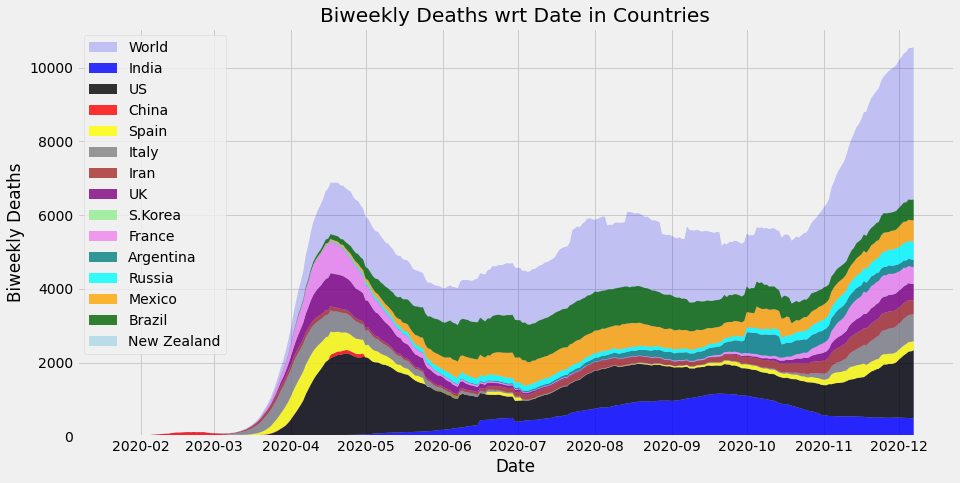

In [13]:
stackplotter(Biweekly_Deaths, 'Biweekly Deaths')

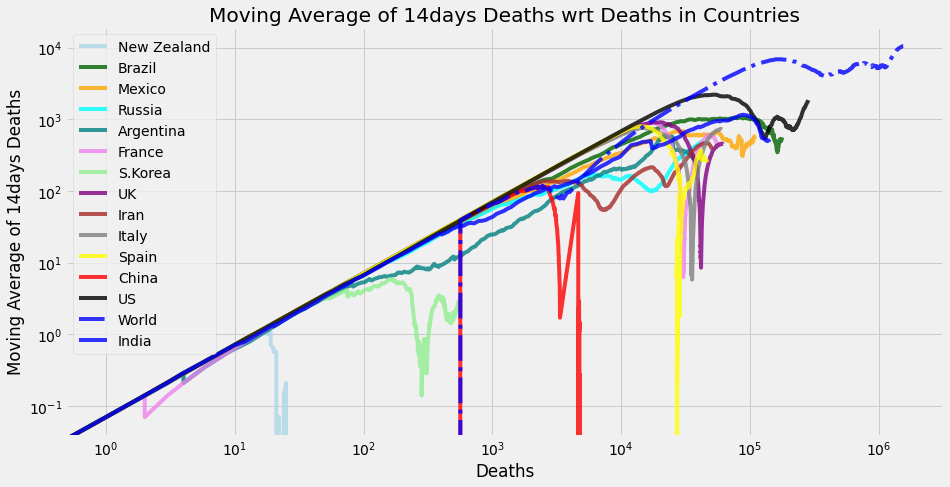

In [14]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)

In [15]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-12-03,496,10539,1838,0,238,741,380,440,3,456,195,498,562,544,0
2020-12-04,500,10794,2011,1,226,739,371,438,3,409,185,508,660,570,0
2020-12-05,498,10859,2163,0,226,736,361,426,3,409,187,507,571,581,0
2020-12-06,491,10898,2204,0,226,739,348,429,3,405,185,507,580,587,0
2020-12-07,477,10868,2237,0,225,719,335,427,4,399,165,519,591,600,0


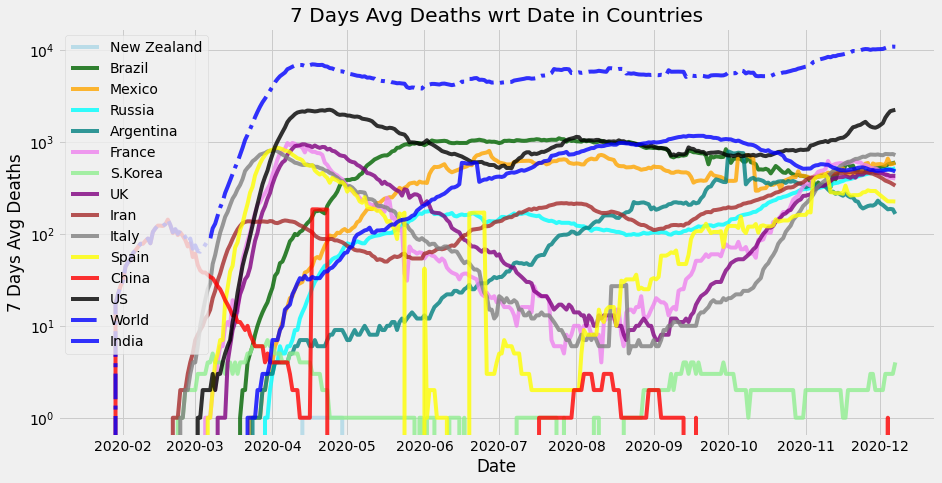

In [16]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

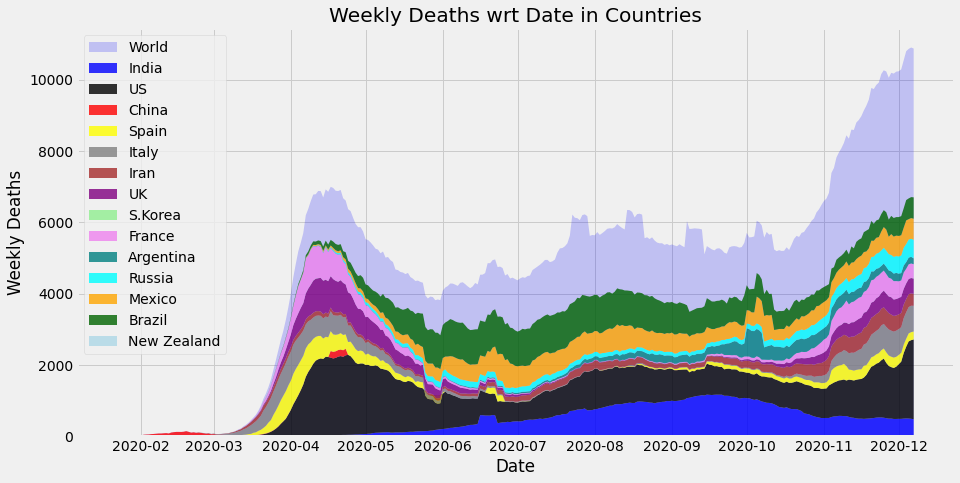

In [17]:
stackplotter(Weekly_Deaths, 'Weekly Deaths')

In [18]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-12-03,522,12601,2760,1,323,821,367,555,3,471,192,561,744,717,0
2020-12-04,526,12455,2763,1,247,830,356,522,5,421,195,560,699,716,0
2020-12-05,511,11709,2580,1,156,823,342,438,5,389,159,533,630,704,0
2020-12-06,462,9932,1991,0,71,680,321,377,4,339,155,501,515,557,0
2020-12-07,419,8621,1590,0,131,585,300,272,4,251,125,464,404,451,0


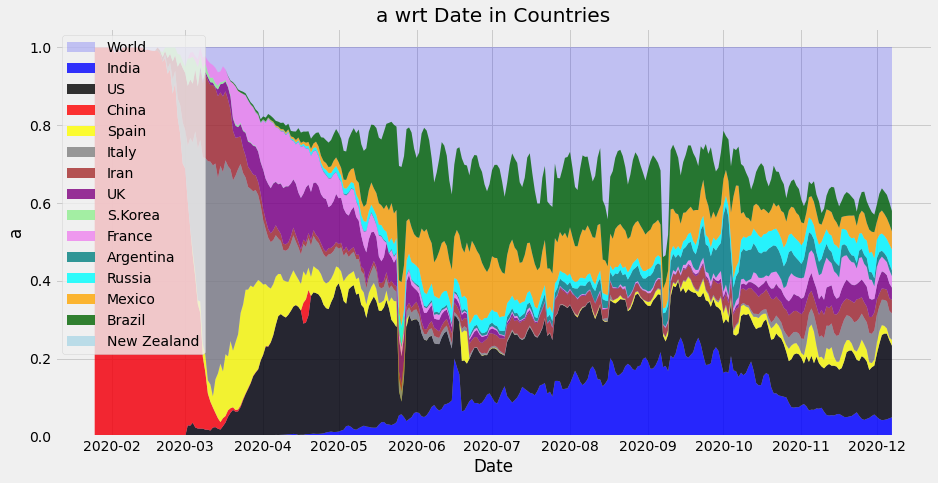

In [19]:
stackplotter(ThreeDaysDeaths.divide(ThreeDaysDeaths.World, axis=0),#.clip(upper=1.0, lower=0.0),
             'a')

In [20]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-12-03,540,12518,2879,1,254,993,358,414,7,325,149,543,608,755,0
2020-12-04,512,12410,2607,1,214,814,347,504,4,628,207,557,690,694,0
2020-12-05,482,10198,2254,0,0,662,321,397,5,214,120,498,593,664,0
2020-12-06,391,7188,1113,0,0,564,294,231,4,174,138,447,261,313,0
2020-12-07,385,8477,1404,0,394,528,284,189,3,366,118,447,357,376,0


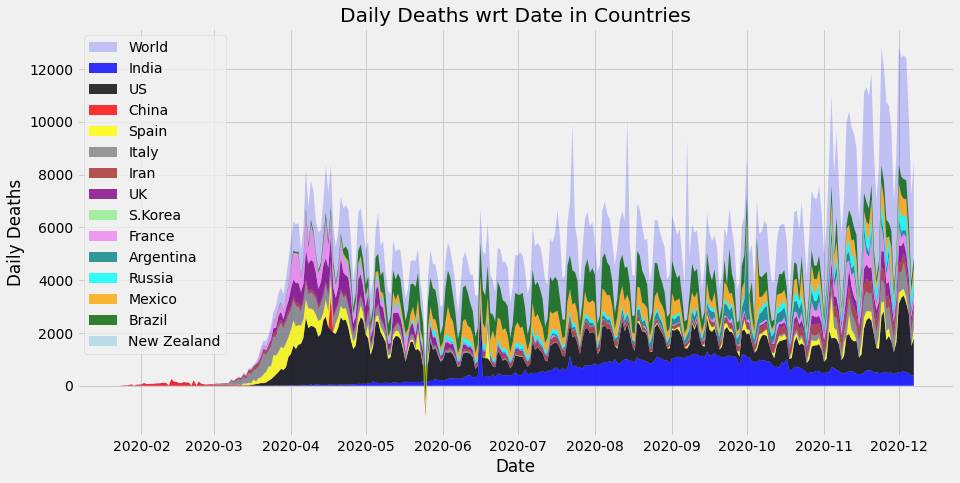

In [21]:
stackplotter(Daily_Deaths, 'Daily Deaths')

In [22]:
Reproductivity = np.round(Weekly_Deaths/Biweekly_Deaths.shift(7), 4)#.iloc[-1]
# Reproductivity = Reproductivity.fillna(1).clip(upper=10, lower=0.3)
Reproductivity[Countries].iloc[-1]

Country/Region
India          0.9403
World          1.0795
US             1.4903
China          0.0000
Spain          0.8255
Italy          1.0227
Iran           0.7484
UK             0.9481
S.Korea        1.7467
France         0.7257
Argentina      0.7692
Russia         1.1521
Mexico         1.1688
Brazil         1.1821
New Zealand       NaN
Name: 2020-12-07 00:00:00, dtype: float64

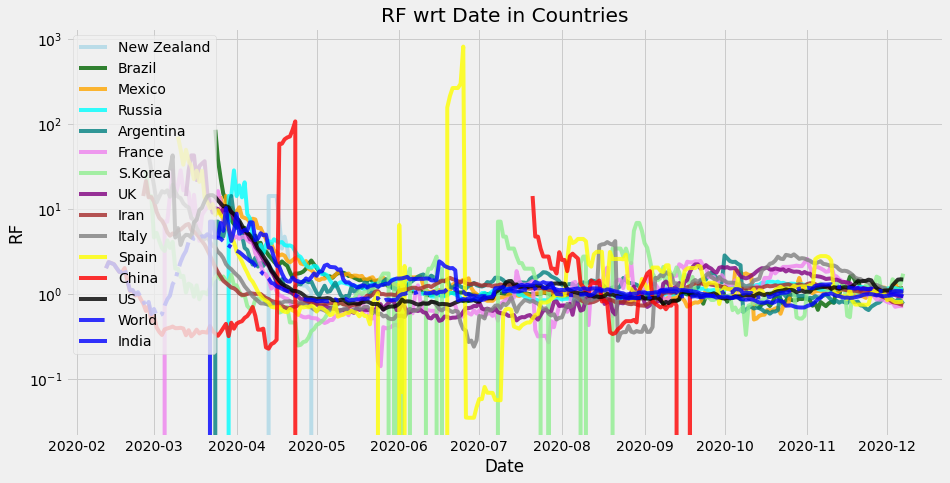

In [24]:
plotter(Reproductivity, 'RF')
# pd.melt(Reproductivity).to_csv('CSVs/Reproductivity.csv')

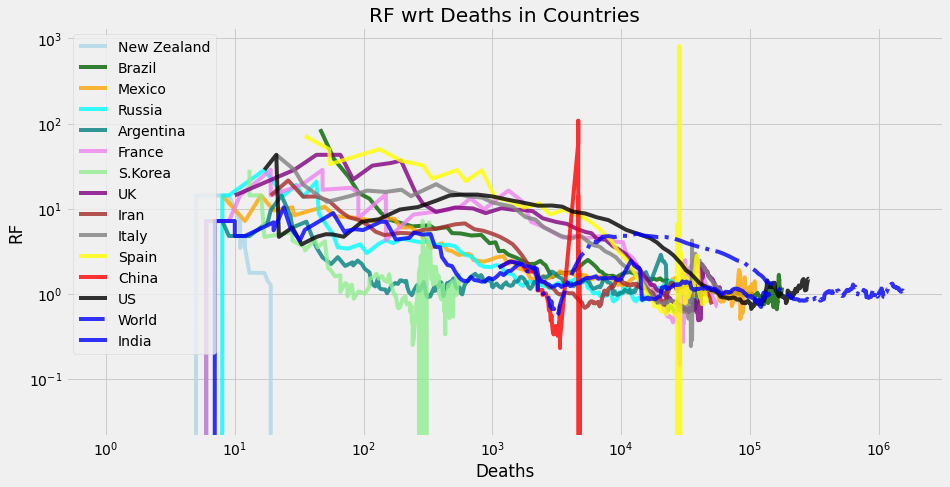

In [25]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [26]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [27]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Weekly Deaths': Weekly_Deaths,
    'Triday Deaths': ThreeDaysDeaths,
    'Daily Deaths':Daily_Deaths,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
# LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=4000]

In [28]:
Growth = np.round(Weekly_Deaths/Deaths, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-12-03,0.0036,0.0070,0.0067,0.0000,0.0052,0.0128,0.0077,0.0073,0.0056,0.0084,0.0050,0.0121,0.0052,0.0031,0.0
2020-12-04,0.0036,0.0071,0.0072,0.0002,0.0049,0.0126,0.0075,0.0072,0.0056,0.0075,0.0047,0.0122,0.0061,0.0032,0.0
2020-12-05,0.0036,0.0071,0.0077,0.0000,0.0049,0.0124,0.0072,0.0070,0.0055,0.0074,0.0047,0.0120,0.0052,0.0033,0.0
2020-12-06,0.0035,0.0071,0.0078,0.0000,0.0049,0.0123,0.0069,0.0070,0.0055,0.0073,0.0047,0.0119,0.0053,0.0033,0.0
2020-12-07,0.0034,0.0070,0.0079,0.0000,0.0048,0.0119,0.0066,0.0069,0.0072,0.0072,0.0041,0.0120,0.0054,0.0034,0.0


In [29]:
def days100(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]

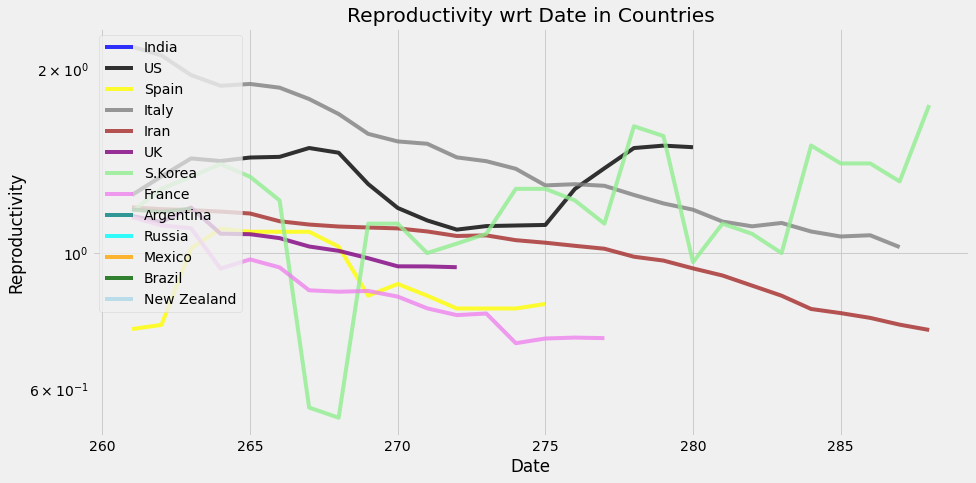

In [30]:
RF = days100(Reproductivity).tail(60)
plotter(RF[[cun for cun in Countries if cun not in ['China', 'World']]], 'Reproductivity', col = 'all')

In [31]:
LastDay_DF.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Vanuatu', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'World',
       'World without China'],
      dtype='object', name='Country', length=194)

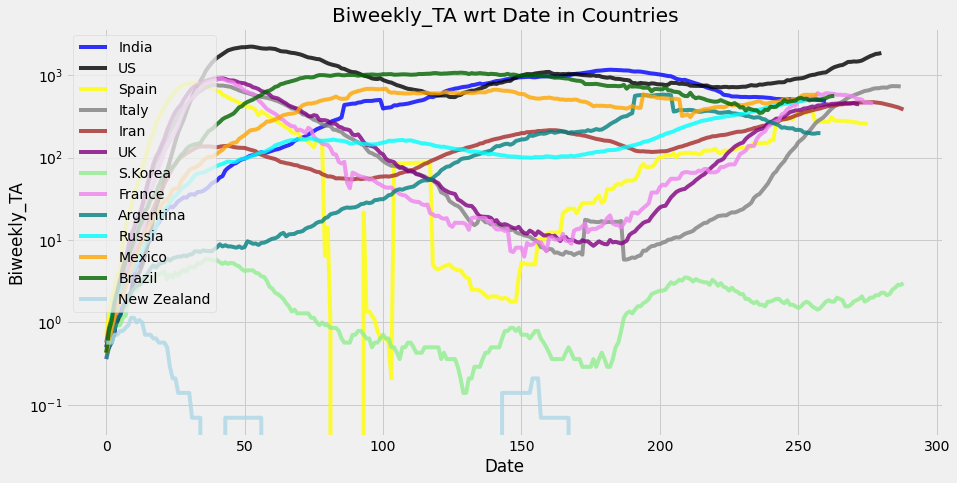

In [32]:
BD = days100(Biweekly_Deaths)
plotter(BD[[cun for cun in Countries if cun not in ['China', 'World']]], 'Biweekly_TA', col = 'all')

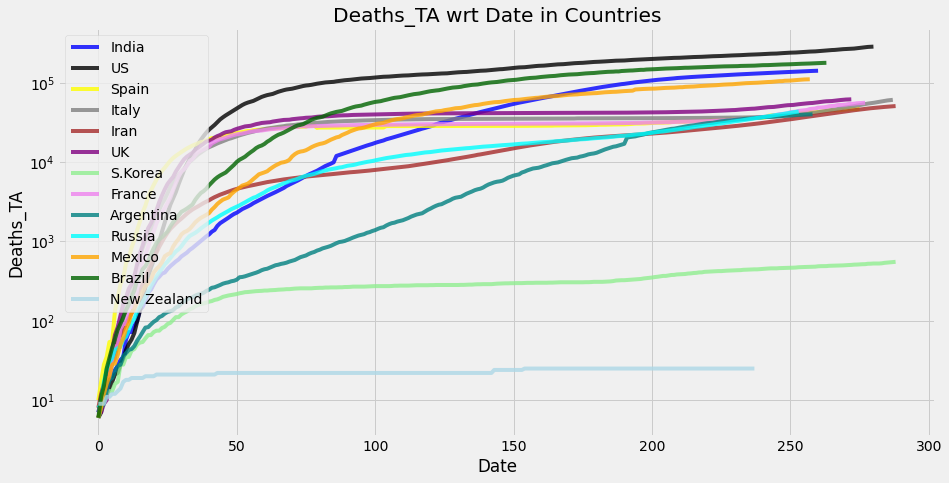

In [33]:
D = days100(Deaths)
plotter(D[[cun for cun in Countries if cun not in ['China', 'World']]], 'Deaths_TA', col = 'all')

In [34]:
def TA(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [0 for _ in range(len(X[col]) - len(L))]
    return X

In [35]:
def csvify(X, name):
    DF = X.copy()
    DF['Date'] = DF.index
    DF = pd.melt(DF, id_vars = 'Date')
    DF.to_csv(f'CSVs\\{name}.csv', index = False)

In [36]:
# for name, df in {'Deaths': Deaths, 
#            'BiweeklyDeaths': Biweekly_Deaths,
#            'Daily_Deaths': Daily_Deaths,
#            'Reproductivity': Reproductivity,
#           }.items():
#     csvify(df, name)
#     csvify(TA(df), 'TA_' + name)

In [37]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,1544533,10544.29,10868,8621,8477,1.0795
World without China,1539787,10544.00,10867,8621,8477,1.0795
US,283703,1851.50,2237,1590,1404,1.4903
Brazil,177317,559.43,600,451,376,1.1821
India,140958,481.43,477,419,385,0.9403
Mexico,110074,582.00,591,404,357,1.1688
UK,61531,443.14,427,272,189,0.9481
Italy,60606,725.21,719,585,528,1.0227
France,55613,450.07,399,251,366,0.7257


In [38]:
LastDay_DF.sort_values('Weekly Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,1544533,10544.29,10868,8621,8477,1.0795
World without China,1539787,10544.00,10867,8621,8477,1.0795
US,283703,1851.50,2237,1590,1404,1.4903
Italy,60606,725.21,719,585,528,1.0227
Brazil,177317,559.43,600,451,376,1.1821
Mexico,110074,582.00,591,404,357,1.1688
Russia,43122,495.00,519,464,447,1.1521
India,140958,481.43,477,419,385,0.9403
Poland,20181,457.64,433,274,92,0.9104


In [39]:
LastDay_DF[(LastDay_DF['Reproductive Factor']>.8) & (LastDay_DF['Weekly Deaths']>200)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Brazil,177317,559.43,600,451,376,1.1821
Germany,19434,355.29,391,286,445,1.4177
India,140958,481.43,477,419,385,0.9403
Italy,60606,725.21,719,585,528,1.0227
Mexico,110074,582.00,591,404,357,1.1688
Poland,20181,457.64,433,274,92,0.9104
Russia,43122,495.00,519,464,447,1.1521
Spain,46646,251.07,225,131,394,0.8255
US,283703,1851.50,2237,1590,1404,1.4903


In [40]:
LastDay_DF[(LastDay_DF['Weekly Deaths'] == 0) & (LastDay_DF.Deaths > 300)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Australia,908,0.07,0,0,0,0.0
Bahrain,341,0.14,0,0,0,0.0
China,4746,0.29,0,0,0,0.0
Ghana,325,0.14,0,0,0,NaN
Uzbekistan,611,0.50,0,0,0,0.0


In [41]:
LastDay_DF[LastDay_DF['Weekly Deaths']> 200]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Brazil,177317,559.43,600,451,376,1.1821
France,55613,450.07,399,251,366,0.7257
Germany,19434,355.29,391,286,445,1.4177
India,140958,481.43,477,419,385,0.9403
Iran,50594,381.36,335,300,284,0.7484
Italy,60606,725.21,719,585,528,1.0227
Mexico,110074,582.00,591,404,357,1.1688
Poland,20181,457.64,433,274,92,0.9104
Russia,43122,495.00,519,464,447,1.1521


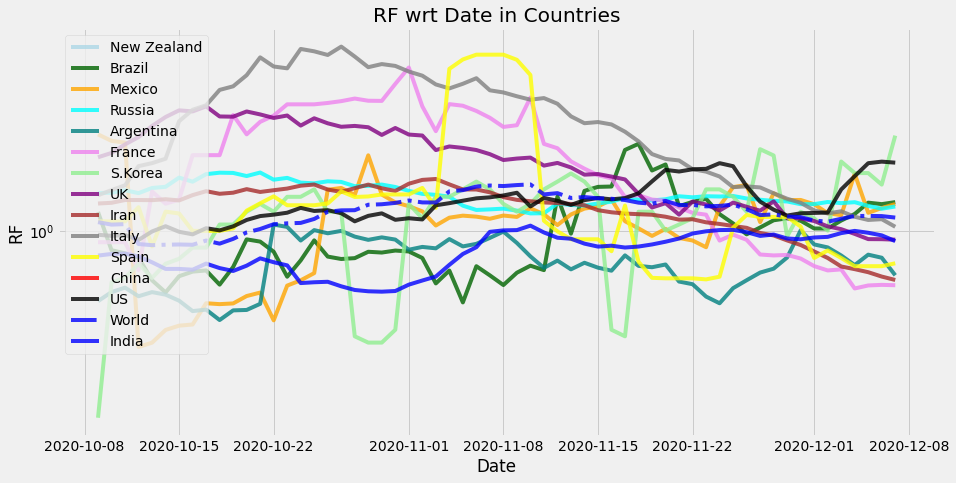

In [42]:
plotter(Reproductivity.tail(60), 'RF')

In [43]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[2:]
    deaths = DF[name][2:]
    
    print ('World: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World:  1544533


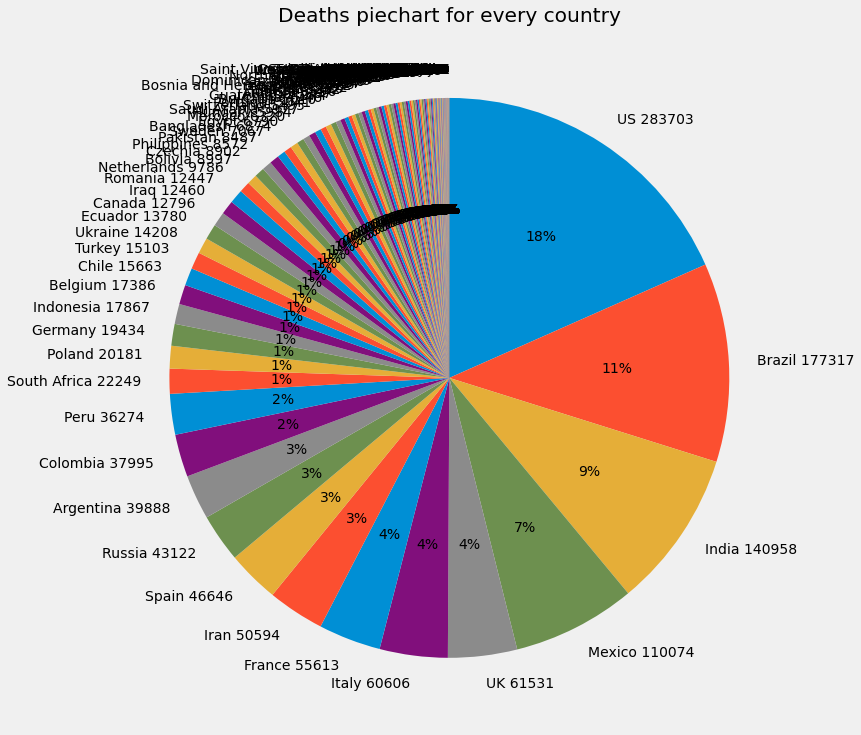

In [44]:
piechart()

World:  10868


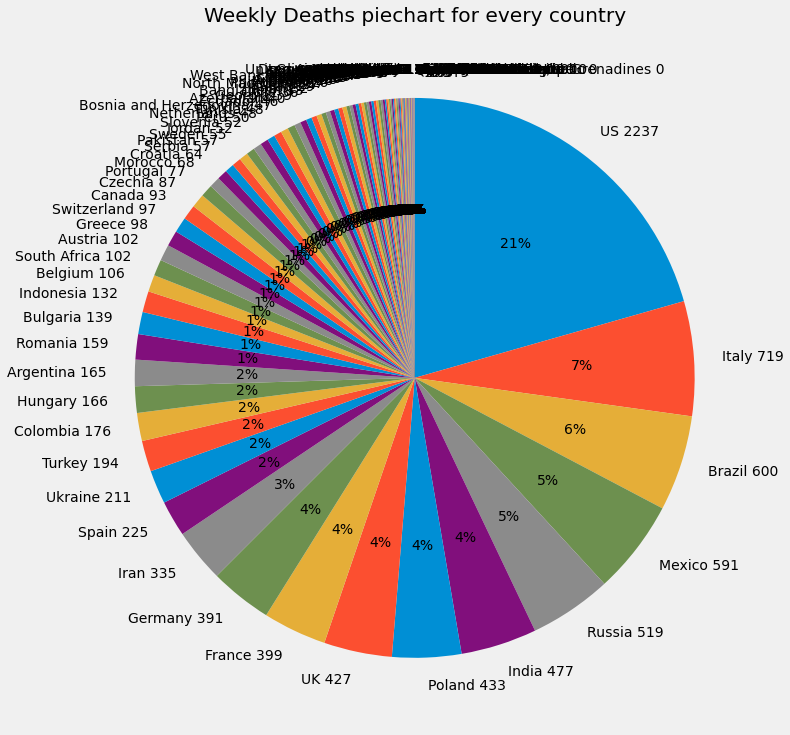

In [45]:
piechart('Weekly Deaths')

World:  8477


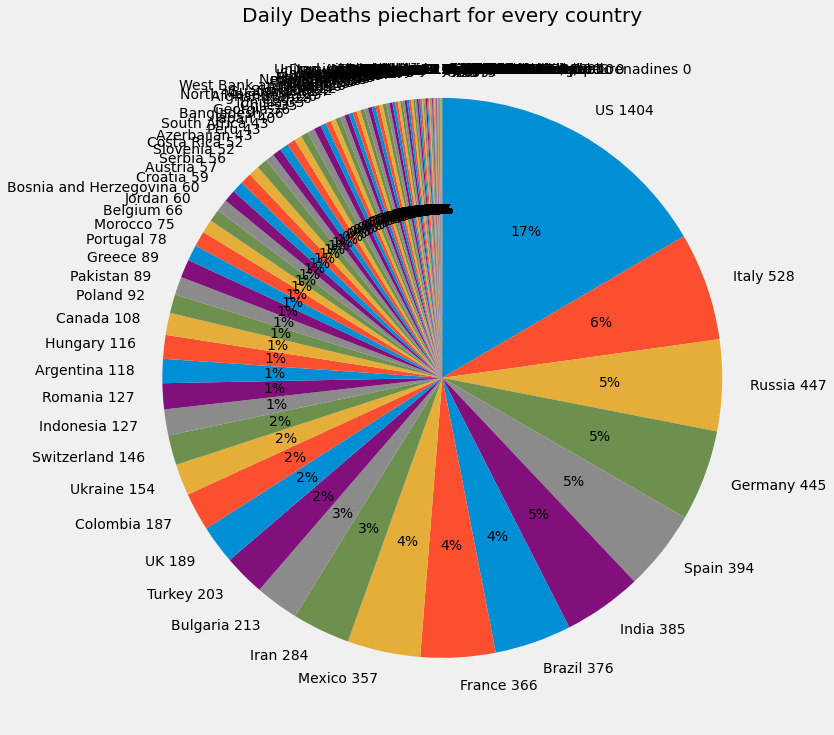

In [46]:
piechart('Daily Deaths')

In [47]:
dt.datetime.now().date()

datetime.date(2020, 12, 8)